In [23]:
# Ian McLean 1877711
# PHYS 434
# 10/25/2022

__1. Estimating π__

a. Generate N=1000 random points (x,y) within a square by requiring the range of x and y are both within [0, 1].

In [24]:
# importing necessary imports
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

# limits and number of coordinates
low = 0
high = 1
N = 1000
  
# generating from random uniform distribution based on limits and size above
x = np.random.uniform(low,high,N)
y = np.random.uniform(low,high,N)
  
# initializing empty list to hold each set of coordinates
list_of_coordinates = []

# generating 1000 pairs of coordinates
for i in range(N):
    # refresh the cumulative pair list every time
    pair = []
    pair.append(x[i])
    pair.append(y[i])
    # add list of both coordinates to set containing both coordinates
    list_of_coordinates.append(pair)

Essentially what is happening here, is that we are generating 1000 different, independent, x and y coordinates in separate arrays from a uniform distribution. This is allowed as Monte-Carlo integration requires truly random points be generated to integrate. Then, these points are paired together in lists for corresponding indices of the X and Y arrays, and then put into another list to hold the coordinates.

b. Visualize the result with red dots when data points are inside the unit circle (otherwise blue dots). In the figure, draw the unit circle as boundar line.



Text(0.5, 1.0, 'Monte-Carlo integration of a quarter circle with 1000 pts')

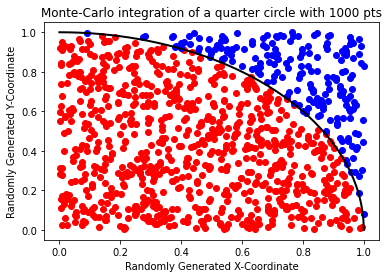

In [25]:
# checking for each coordinate if it is outside of the radius of the unit circle
# if it is, plot it blue, otherwise plot red
for i in list_of_coordinates:
    if np.sqrt((i[0])**2 + (i[1])**2) > 1:
        plt.scatter(i[0], i[1], color = 'blue')
    else:
        plt.scatter(i[0], i[1], color = 'red')
        
# x_vals for plotting function
# points are plotted with circle equation to visualize pts inside and outside
x_vals = np.linspace(0,1,1000)
plt.plot(x_vals,np.sqrt(1 - (x_vals)**2), lw = 2, color = 'black')

# Adding all labels, details, and legend onto the plot
plt.xlabel('Randomly Generated X-Coordinate')
plt.ylabel('Randomly Generated Y-Coordinate')
plt.title('Monte-Carlo integration of a quarter circle with 1000 pts')

Visualization of the plotting of random points shows that they were colored correctly as the blue ones are outside the circle, whereas the red ones are inside. The case being that we required red points be the randomly generated points that have a radius less than 1, where the radius is the distance from the origin to the specific point. Anything greater than that is outside of the circle, and is colored blue.

c. Count number of points inside the unit circle, and estimate the value and uncertainty of π.


In [26]:
# initializing counter
True_count = 0

# looping through all generated points, if radius less than 1 it is in circle and add to count
for i in list_of_coordinates:
    if np.sqrt((i[0])**2 + (i[1])**2) <= 1:
        True_count = True_count + 1

# area is amount of True/ total counts
Area = (True_count/len(list_of_coordinates))

# radius of unit circle
r = 1

# area of quarter circle set equal to pi to solve for it
pi = (4 * Area)/(1**2)
print("The estimated value of pi for N = 1000 is: " + str(pi))

The estimated value of pi for N = 1000 is: 3.212


As we can see, the estimated value of pi is in the right ballpark, however it is clearly still less than what we are expecting. This can be attributed to the low number of points generated. The plot clearly shows plenty of empty space still in the inside of the circle, which could be accounted for with more randomly generated points covering the area.

d. Repeat steps abobe with N=10K and 1000K. Discuss the results in terms of numerical consistency with known π value, and scaling rule of the uncertainty.

In [29]:
# new number of samples
N2 = 10000
  
# generating from random uniform distribution based on limits and size above
x = np.random.uniform(low,high,N2)
y = np.random.uniform(low,high,N2)
  
# initializing empty list to hold each set of coordinates
list_of_coordinates= []

# generating 10000 pairs of coordinates
for i in range(N2):
    # refresh the cumulative pair list every time
    pair = []
    pair.append(x[i])
    pair.append(y[i])
    # add list of both coordinates to set containing both coordinates
    list_of_coordinates.append(pair)

# initializing counter    
True_count = 0

# looping through all generated points, if radius less than 1 it is in circle and add to count
for i in list_of_coordinates:
    if np.sqrt((i[0])**2 + (i[1])**2) <= 1:
        True_count = True_count + 1
    
# area is amount of True/ total counts
Area = (True_count/len(list_of_coordinates)) 

# radius of unit circle
r = 1

# area of quarter circle set equal to pi to solve for it
pi = (4 * Area)/(1**2)
print("The estimated value of pi for N = 10K is: " + str(pi))   

The estimated value of pi for N = 10K is: 3.136


This value is closer to the actual value of pi at 3.14159... which can be attributed to the increased number of randomly generated points as we sampled an adsitional 9K points to oncrease the accuracy. This was the only variable changed to attain this more accurate value of pi.

In [28]:
# new number of samples
N3 = 100000
  
# generating from random uniform distribution based on limits and size above
x = np.random.uniform(low,high,N3)
y = np.random.uniform(low,high,N3)
  
# initializing empty list to hold each set of coordinates
list_of_coordinates= []

# generating 10000 pairs of coordinates
for i in range(N3):
    # refresh the cumulative pair list every time
    pair = []
    pair.append(x[i])
    pair.append(y[i])
    # add list of both coordinates to set containing both coordinates
    list_of_coordinates.append(pair)

# initializing counter
True_count = 0

# looping through all generated points, if radius less than 1 it is in circle and add to count
for i in list_of_coordinates:
    if np.sqrt((i[0])**2 + (i[1])**2) <= 1:
        True_count = True_count + 1

# area is amount of True/ total counts
Area = (True_count/len(list_of_coordinates)) 

# radius of unit circle
r = 1

# area of quarter circle set equal to pi to solve for it
pi = (4 * Area)/(1**2)
print("The estimated value of pi for N = 100K is: " + str(pi))   
print("The estimated uncertainty of pi for N = 100K is: " + str(round(1/np.sqrt(N3),3)))   

The estimated value of pi for N = 100K is: 3.14144
The estimated uncertainty of pi for N = 100K is: 0.003


It is clear that with an additional 90K sample points, the value gets slightly closer to the actual value of pi at 3.14159..., however, one should consider the additional time to complete the computation just to get a value that is slightly more accurate. In terms of uncertainty scaling, it is clear that this error should scale as $\frac{1}{\sqrt{N}}$ where N is the number of sample points. Essentially, our uncertainty at 100K sampled points is incredibly low, where as it was much higher with just 1000 points. Intuitively this makes sense though, as our value of pi at N = 1000 was further off from the actual value than that from the plot of 100K sample points.

__2. Parabola distribution__

Generate a random distribution between x= -1 and x= +1 from the distribution function $f(x)=x^{2}$

a. Using Rejection method. Generate a random variable xi uniformly distributed between -1 and +1, and a second random ravariable yi unformly distributed between 0 and f(1), i.e. allowed range of the distribution function. Keep xi if f(xi)<yi. Generate a sample with N=10K data points.

In [30]:
# generating random variable for x
xi = np.random.uniform(-1,1,100000)

# defining f(1) for the y upper bound
f1 = 1**2

# generating random variable for y
yi = np.random.uniform(0,f1,100000)

# initializing counter and list to hold non-rejected values
sample = []
counter = 0

# making a list of accepted x coordinates until length reaches 10000
while len(sample) < 10000:
    # if condition is met, append
    if (xi[counter])**2 > yi[counter]:
        sample.append(xi[counter])
    #stepping counter by 1
    counter = counter + 1

In order to use rejection method, we must generate a random array of x coordinates ranging from -1 to 1 and a y array ranging from 0 to the max value of the function on the interval of the x. Then, this x array is passed into the function and we will reject the original x coordinate if it ends up being less than the y value. Otherwise, it is biggger, and it is appended to the list of our values and is therefore not rejected. From there, these accepted values can be plotted in a histogram to demonstrate frequency that an x coordinate is sampled from each interval and should hopefully resemble the distribution under $x^{2}$, more or less.

b. Using Inverse transformation method. Caculate the cumulative function $y=F(x)$ and derive the inverse transformation function $x=F^{−1}(y)$. Generate a random uniform distribution yi between [-1, 1], and obtain the target distribution xi with N=10K point.

$$f(x) = x'^{2}$$
$$F(x) = \int_{-1}^{x}{x'^{2}}dx$$
$$F(x) = y = \frac{x^3}{3} + \frac{1}{3}$$
$$3y = x^3 + 1$$
$$x = F^{-1}(y) = \sqrt[3]{3y-1}$$

In [31]:
# generating random variable for y
yi2 = np.random.uniform(-1,1,10000)

# applying the inverse transform function to the random y values to generate the desired distribution
sample2 = np.cbrt(3*yi2 - 1)


In order to do this, the calculation is outlined above, where the PDF is integrated from the lower bound of the distribution, in this case -1, to whatever the desired x value is, so to x. THis gives the CDF which is labeled as $F(x)$ and then the inverse of this can be calculated by the steps above and we see that $F^{-1}(y)$ is calculated as $\sqrt[3]{3y-1}$. The y distribution is just plugged into this transformation and frequency is plotted on a hostogram as well, and we hope the distribution resembles that under the parabola.

c. Compare consistency by drawing two simulated distrubtions and the target distribution function f(x) in the same plot. Comment on which menthod is more effective in terms of total number of random number reuqired for MC simulations.

<function matplotlib.pyplot.show(close=None, block=None)>

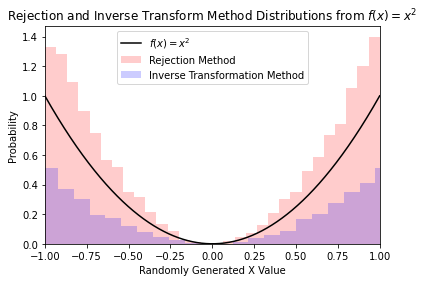

In [32]:
# defining plotting linspace
x = np.linspace(-1,1,10000)

# plotting the x^2 function and the two different histograms
plt.plot(x,x**2, color = 'black')
plt.hist(sample, alpha = .2, color = 'red', density = True, bins = 30)
plt.hist(sample2, alpha = .2, color = 'b', density = True, bins = 30)

# Adding all labels, details, and legend onto the plot
plt.xlabel('Randomly Generated X Value')
plt.ylabel('Probability')
plt.title("Rejection and Inverse Transform Method Distributions from $f(x) = x^{2}$")
plt.legend([r'$f(x) = x^{2}$', 'Rejection Method', 'Inverse Transformation Method'])
plt.xlim([-1,1])
plt.show

Essentially what we are seeing here. is that the rejection method will lead to some probabilities larger than the parabola distribution. Thus, the histogram bars are higher than the plotted function for each bin. As for the inverse transformation function, we see that it is often an inderestimate with less sampling occuring than the parabola distribution shows. Therefore, the rejection method is an overestimate whereas the inverse transformation is an underestimate.